In [120]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import neural_network
from sklearn import metrics
import time

In [96]:
df = pd.read_csv("digits.csv")
X = df.iloc[:, 1:].values
y = df["label"].values
df.head()

,label,0x0,0x1,0x2,0x3,0x4,0x5,0x6,0x7,0x8,...,13x4,13x5,13x6,13x7,13x8,13x9,13x10,13x11,13x12,13x13
0,7,0,0,0,0,0,0,0,0,0,...,0,0,41,88,3,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


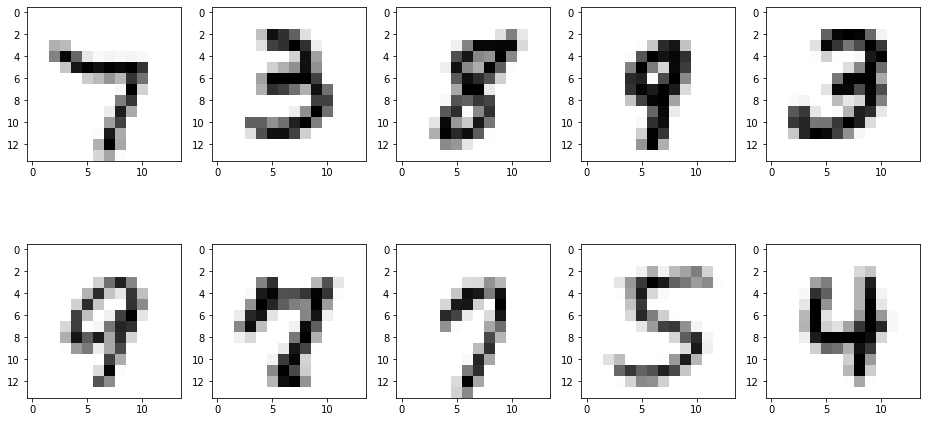

In [97]:
fig = plt.figure(figsize=(16,8))
for i in range(10):
    for j in range(y.shape[0]):
        if y[j] == i:
            ax = fig.add_subplot(2, 5, i+1)
            ax.imshow(X[i].reshape(14,14), cmap=plt.cm.gray_r)
            break

In [116]:
def evaluate_MLP(X, y, act, layers):
    kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=10)
        
    f1 = []
    precision = []
    recall = []
    for train_index, test_index in kf.split(X):    
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        X_scaler = preprocessing.MinMaxScaler()
        X_train = X_scaler.fit_transform(X_train)
        
        model = neural_network.MLPClassifier(activation=act, hidden_layer_sizes=layers, 
                                                     max_iter=1000, solver='lbfgs')

        model.fit(X_train, y_train)
        
        X_test = X_scaler.fit_transform(X_test)
        y_pred = model.predict(X_test)
        
        f1 += [metrics.f1_score(y_test, y_pred, average="macro")]
        precision += [metrics.precision_score(y_test, y_pred, average="macro")]
        recall += [metrics.recall_score(y_test, y_pred, average="macro")]
        
    print(f"    average precision: {np.mean(precision)}")
    print(f"    average recall: {np.mean(recall)}")
    print(f"    average f1: {np.mean(f1)}")
    
    

In [117]:
print("2 hidden layers with 20 nodes in each layer (tanh):")
evaluate_MLP(X, y, "tanh", (20,20))
print("2 hidden layers with 20 nodes in each layer (relu):")
evaluate_MLP(X, y, "relu", (20,20))
print("2 hidden layers with 100 nodes in each layer (tanh):")
evaluate_MLP(X, y, "tanh", (100,100))
print("2 hidden layers with 100 nodes in each layer (relu):")
evaluate_MLP(X, y, "relu", (100,100))
print("5 hidden layers with 20 nodes in each layer (tanh):")
evaluate_MLP(X, y, "tanh", (20, 20, 20, 20, 20))
print("5 hidden layers with 20 nodes in each layer (relu):")
evaluate_MLP(X, y, "relu", (20, 20, 20, 20, 20))
print("5 hidden layers with 100 nodes in each layer (tanh):")
evaluate_MLP(X, y, "tanh", (100, 100, 100, 100, 100))
print("5 hidden layers with 100 nodes in each layer (relu):")
evaluate_MLP(X, y, "relu", (100, 100, 100, 100, 100))

2 hidden layers with 20 nodes in each layer (tanh):
    average precision: 0.9106658037975757
    average recall: 0.9115658765070547
    average f1: 0.91064233916888
2 hidden layers with 20 nodes in each layer (relu):
    average precision: 0.912466422241321
    average recall: 0.9137384196119754
    average f1: 0.912759966210054
2 hidden layers with 100 nodes in each layer (tanh):
    average precision: 0.9322908206052112
    average recall: 0.9328697860884881
    average f1: 0.932241432045546
2 hidden layers with 100 nodes in each layer (relu):
    average precision: 0.9308059706827552
    average recall: 0.9311434753849193
    average f1: 0.9307237587781637
5 hidden layers with 20 nodes in each layer (tanh):
    average precision: 0.9131351566519479
    average recall: 0.9126839688480978
    average f1: 0.9123449246143605
5 hidden layers with 20 nodes in each layer (relu):


/Users/laynelmoon/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


    average precision: 0.9010229801118845
    average recall: 0.901330321622982
    average f1: 0.9007676900958488
5 hidden layers with 100 nodes in each layer (tanh):
    average precision: 0.9344247023657696
    average recall: 0.9349873504314473
    average f1: 0.9344048671532198
5 hidden layers with 100 nodes in each layer (relu):
    average precision: 0.9366138928193617
    average recall: 0.9363299675648171
    average f1: 0.9361638953267309


In [118]:
def get_train_time(X, y, layers):
    kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=10)
        
    times = []
    for train_index, test_index in kf.split(X):    
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        X_scaler = preprocessing.MinMaxScaler()
        X_train = X_scaler.fit_transform(X_train)
        
        model = neural_network.MLPClassifier(activation="relu", hidden_layer_sizes=layers, 
                                                     max_iter=1000, solver='lbfgs')
        start = time.time()
        model.fit(X_train, y_train)
        time_spent = time.time() - start
        
        X_test = X_scaler.fit_transform(X_test)
        y_pred = model.predict(X_test)
        
        times += [time_spent]
        
    return np.mean(times)

[1.2561214447021485, 1.6000930309295653, 2.234536075592041, 2.428253507614136, 3.416211986541748]


Text(0, 0.5, 'time spent with 5 folds')

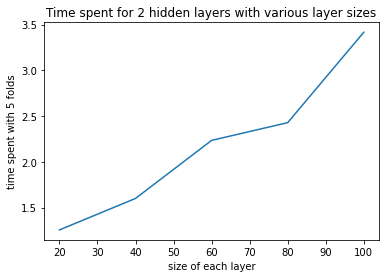

In [121]:
times = []
times += [get_train_time(X, y, (20, 20))]
times += [get_train_time(X, y, (40, 40))]
times += [get_train_time(X, y, (60, 60))]
times += [get_train_time(X, y, (80, 80))]
times += [get_train_time(X, y, (100, 100))]
print(times)
sizes = [20, 40, 60, 80, 100]
f = plt.figure()
plt.title("Time spent for 2 hidden layers with various layer sizes")
plt.plot(sizes, times)
plt.xlabel('size of each layer')
plt.ylabel('time spent with 5 folds')

Text(0, 0.5, 'time spent with 5 folds')

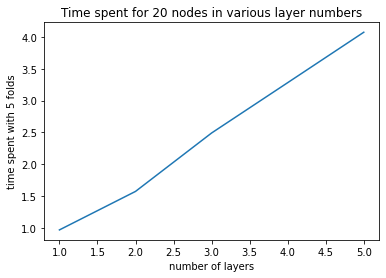

In [122]:
times = []
times += [get_train_time(X, y, (20))]
times += [get_train_time(X, y, (20, 20))]
times += [get_train_time(X, y, (20, 20, 20))]
times += [get_train_time(X, y, (20, 20, 20, 20))]
times += [get_train_time(X, y, (20, 20, 20, 20, 20))]
layers = [1, 2, 3, 4, 5]
f = plt.figure()
plt.title("Time spent for 20 nodes in various layer numbers")
plt.plot(layers, times)
plt.xlabel('number of layers')
plt.ylabel('time spent with 5 folds')